In [300]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.misc import derivative

from scipy.optimize import minimize
%matplotlib inline


### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [51]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


[[1, 9],
 [2, 5],
 [3, 10],
 [4, 10],
 [5, 9],
 [6, 10],
 [7, 4],
 [8, 6],
 [9, 1],
 [10, 3]]

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [52]:
same_pairs =[]
same_v = []
same_v_f = []

def v_angle(x, y):
    return float(np.arccos(np.dot(x,y)/math.sqrt(x.dot(x))/math.sqrt(y.dot(y))))

for i in enumerate(raitings):
    for j in enumerate(raitings):
        same_v_f.append(v_angle(i[1],j[1]))
        if i[0] == j[0]:
            continue
        else:
            same_v.append(v_angle(i[1],j[1]))
    same_pairs.append([i[0]+1, same_v_f.index(min(same_v))+1])
    same_v = []   
    same_v_f = []
same_pairs

[[1, 9],
 [2, 5],
 [3, 10],
 [4, 10],
 [5, 9],
 [6, 10],
 [7, 4],
 [8, 6],
 [9, 1],
 [10, 3]]

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Ответ: вполне можно перейти к формату количесва оценок от и до - 5 признаков: [Количество оценок от 1 до 2] - первый признак, [Количество оценок от 3 до 4] - второй признак  и т.д.

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [59]:
def inv_x(x):
    return np.tan(np.sin(x) + np.cos(2*x +3))**2

print('Зачение 1-ой производной функции f(x) в точке х=1: \033[94m\033[1m', derivative(inv_x, 1.0, dx=1e-6))

Зачение 1-ой производной функции f(x) в точке х=1:  55.3859176464222


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [60]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [61]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [62]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [64]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [228]:
y = minimize(error, (-0.52, 0), method = 'COBYLA')['x']
error([y[0], y[1]])

0.03901441074933221

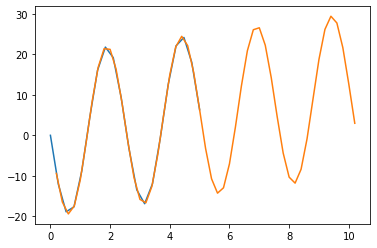

In [229]:
x1 = []
xc = 0

while xc < 10:
    xc += 0.2
    x1.append(xc)

x2 = np.array(x1)

plt.plot(x, fx)
plt.plot(x2, f1(x2))
plt.show()

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

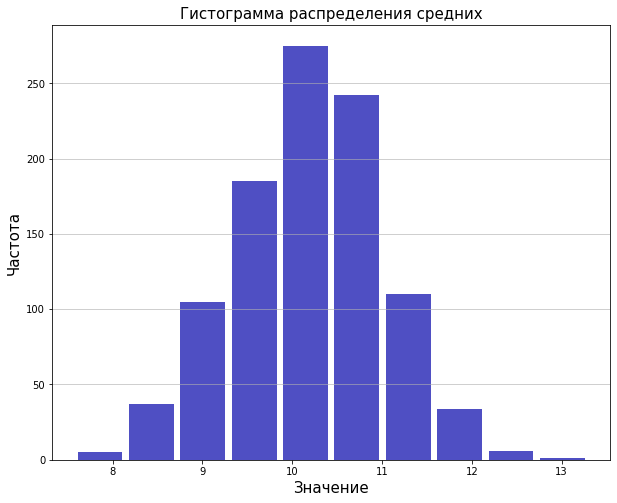

In [320]:
x_dict = {}
for j in range (1000):
    x_dict[j+1] = []
    
aver_dict = []

x = list(range(1, 21, 1))
 
for key in x_dict.keys():
    for j in range (50):
        x_dict[key].append(np.random.choice(x))
        
for element in x_dict.values():
    aver_dict.append(sum(element)/len(element))
        
plt.figure(figsize=[10,8])
hist,bin_edges = np.histogram(aver_dict)
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Значение',fontsize=15)
plt.ylabel('Частота',fontsize=15)
plt.title('Гистограмма распределения средних',fontsize=15)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [231]:
m = np.array([[1, 4], [1, 1]]) 
print('Собственные значения матрицы m: \n',np.linalg.eig(m)[0])
print('Собственные вектора матрицы m: \n',np.linalg.eig(m)[1])

Собственные значения матрицы m: 
 [ 3. -1.]
Собственные вектора матрицы m: 
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
